In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
from sklearn import preprocessing

df = pd.read_csv('new_dfcian.csv')

In [11]:
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN


In [12]:
df.dropna(how='all')

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,МИЭЛЬ,real_estate_agent,https://mytishchi.cian.ru/sale/flat/308939371/,Мытищи,sale,flat,8,14,2,69.7,...,-1,38 м²,"10,5 м²",79672094035,-1,NaN,Юбилейная,6,Медведково,Ярославский
8389,ПИК,developer,https://mytishchi.cian.ru/sale/flat/306943495/,Мытищи,sale,flat,19,25,2,48.1,...,Чистовая,"22,7 м²","16,1 м²",74951370494,"2,62 м",NaN,NaN,NaN,Ростокино,Ярославский квартал ЖК
8390,ID 47276638,homeowner,https://mytishchi.cian.ru/sale/flat/294184046/,Мытищи,sale,flat,3,5,2,45.0,...,-1,-1,6 м²,79153266030,-1,NaN,Юбилейная,11к3,Медведково,NaN
8391,EstateLiga,real_estate_agent,https://mytishchi.cian.ru/sale/flat/304572510/,Мытищи,sale,flat,3,6,2,34.0,...,-1,19 м²,8 м²,79651097781,"2,75 м",NaN,бульвар Тенистый,5,Медведково,Императорские Мытищи


In [13]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df = df.dropna(subset=['price'])

df['price'] = df['price'].astype(float)

df['price'].info()

<class 'pandas.core.series.Series'>
Index: 7892 entries, 0 to 8392
Series name: price
Non-Null Count  Dtype  
--------------  -----  
7892 non-null   float64
dtypes: float64(1)
memory usage: 123.3 KB


<Axes: >

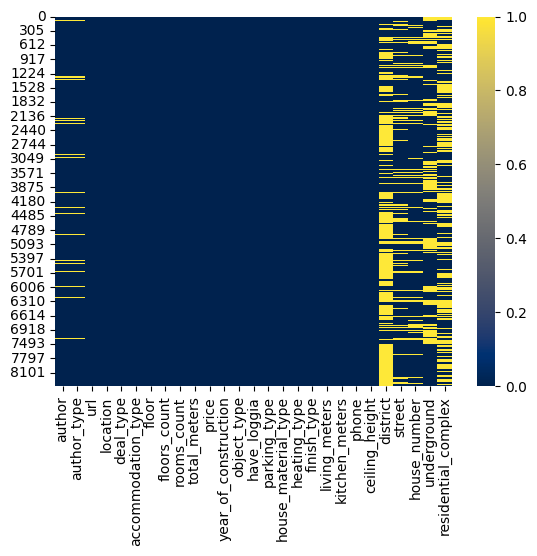

In [14]:
sns.heatmap(df.isnull(),cmap='cividis')

In [15]:
def safe_float_conversion(value):
    if isinstance(value, str):
        cleaned_value = re.sub(r'[^0-9.-]', '', value)
        try:
            return float(cleaned_value)
        except ValueError:
            return value
    return value

  
df = df.apply(lambda x: x.apply(safe_float_conversion))
df

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,115709096.0,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6.0,6.0,1.0,20.7,...,-1.0,18.0,1.0,7.917510e+10,3.0,Серпухов,Крюкова,4.0,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1.0,9.0,1.0,33.0,...,-1.0,18.0,6.0,7.964553e+10,27.0,NaN,Ворошилова,144.0,Аннино,NaN
2,3246838.0,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4.0,4.0,1.0,14.0,...,-1.0,-1.0,-1.0,7.980713e+10,-1.0,Красный Текстильщик мкр,Красный Текстильщик,2.0,NaN,NaN
3,64398571.0,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5.0,5.0,1.0,17.5,...,-1.0,-1.0,-1.0,7.964565e+10,-1.0,Серпухов,Российская,40.0,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4.0,7.0,1.0,25.9,...,-1.0,20.0,5.0,7.909941e+10,35.0,Серпухов,Химиков,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,МИЭЛЬ,real_estate_agent,https://mytishchi.cian.ru/sale/flat/308939371/,Мытищи,sale,flat,8.0,14.0,2.0,69.7,...,-1.0,38.0,105.0,7.967209e+10,-1.0,NaN,Юбилейная,6.0,Медведково,Ярославский
8389,ПИК,developer,https://mytishchi.cian.ru/sale/flat/306943495/,Мытищи,sale,flat,19.0,25.0,2.0,48.1,...,Чистовая,227.0,161.0,7.495137e+10,262.0,NaN,NaN,NaN,Ростокино,Ярославский квартал ЖК
8390,47276638.0,homeowner,https://mytishchi.cian.ru/sale/flat/294184046/,Мытищи,sale,flat,3.0,5.0,2.0,45.0,...,-1.0,-1.0,6.0,7.915327e+10,-1.0,NaN,Юбилейная,113.0,Медведково,NaN
8391,EstateLiga,real_estate_agent,https://mytishchi.cian.ru/sale/flat/304572510/,Мытищи,sale,flat,3.0,6.0,2.0,34.0,...,-1.0,19.0,8.0,7.965110e+10,275.0,NaN,бульвар Тенистый,5.0,Медведково,Императорские Мытищи


In [16]:
df = df.drop_duplicates()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7212 entries, 0 to 8392
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                6952 non-null   object 
 1   author_type           6955 non-null   object 
 2   url                   7212 non-null   object 
 3   location              7212 non-null   object 
 4   deal_type             7212 non-null   object 
 5   accommodation_type    7212 non-null   object 
 6   floor                 7212 non-null   float64
 7   floors_count          7212 non-null   float64
 8   rooms_count           7212 non-null   float64
 9   total_meters          7212 non-null   float64
 10  price                 7212 non-null   float64
 11  year_of_construction  7212 non-null   object 
 12  object_type           7212 non-null   object 
 13  have_loggia           7212 non-null   float64
 14  parking_type          7212 non-null   object 
 15  house_material_type   7212

In [18]:
df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')

df = df.dropna(subset=['year_of_construction'])

df['year_of_construction'] = df['year_of_construction'].astype(int)

print(df['year_of_construction'].dtype) 

print(df['year_of_construction'].unique())

int64
[1917 1975   -1 1968 2009 1969 1980 1990 1964 2025 2015 1970 1984 1965
 2010 1992 2011 1986 1994 1956 1966 1973 1971 1957 2013 1981 1972 1959
 2004 1962 2019 1978 1977 2003 1963 1952 2024 2007 1995 1976 1982 1953
 2008 2026 2023 1941 1993 2016 2027 2017 2022 1932 2012 1960 2006 1926
 2020 1943 2014 2021 1967 1904 2028 1991 2018 1987 1988 1974 1979 1929
 1989 1985 1930 2005 1958 1996 1940 1948 1961 1938 1997 2002 2001 1999
 1983 1998 1902 2000 1915 1910 1939 1954 1897 1955 1900 1949 1947 1901
 1909 1600 1951 1936 1931 1950 1934 1928 1945 1937 1927 1896 1777 2031
 1935]


C:\Users\User\AppData\Local\Temp\ipykernel_10296\432589842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors='coerce')


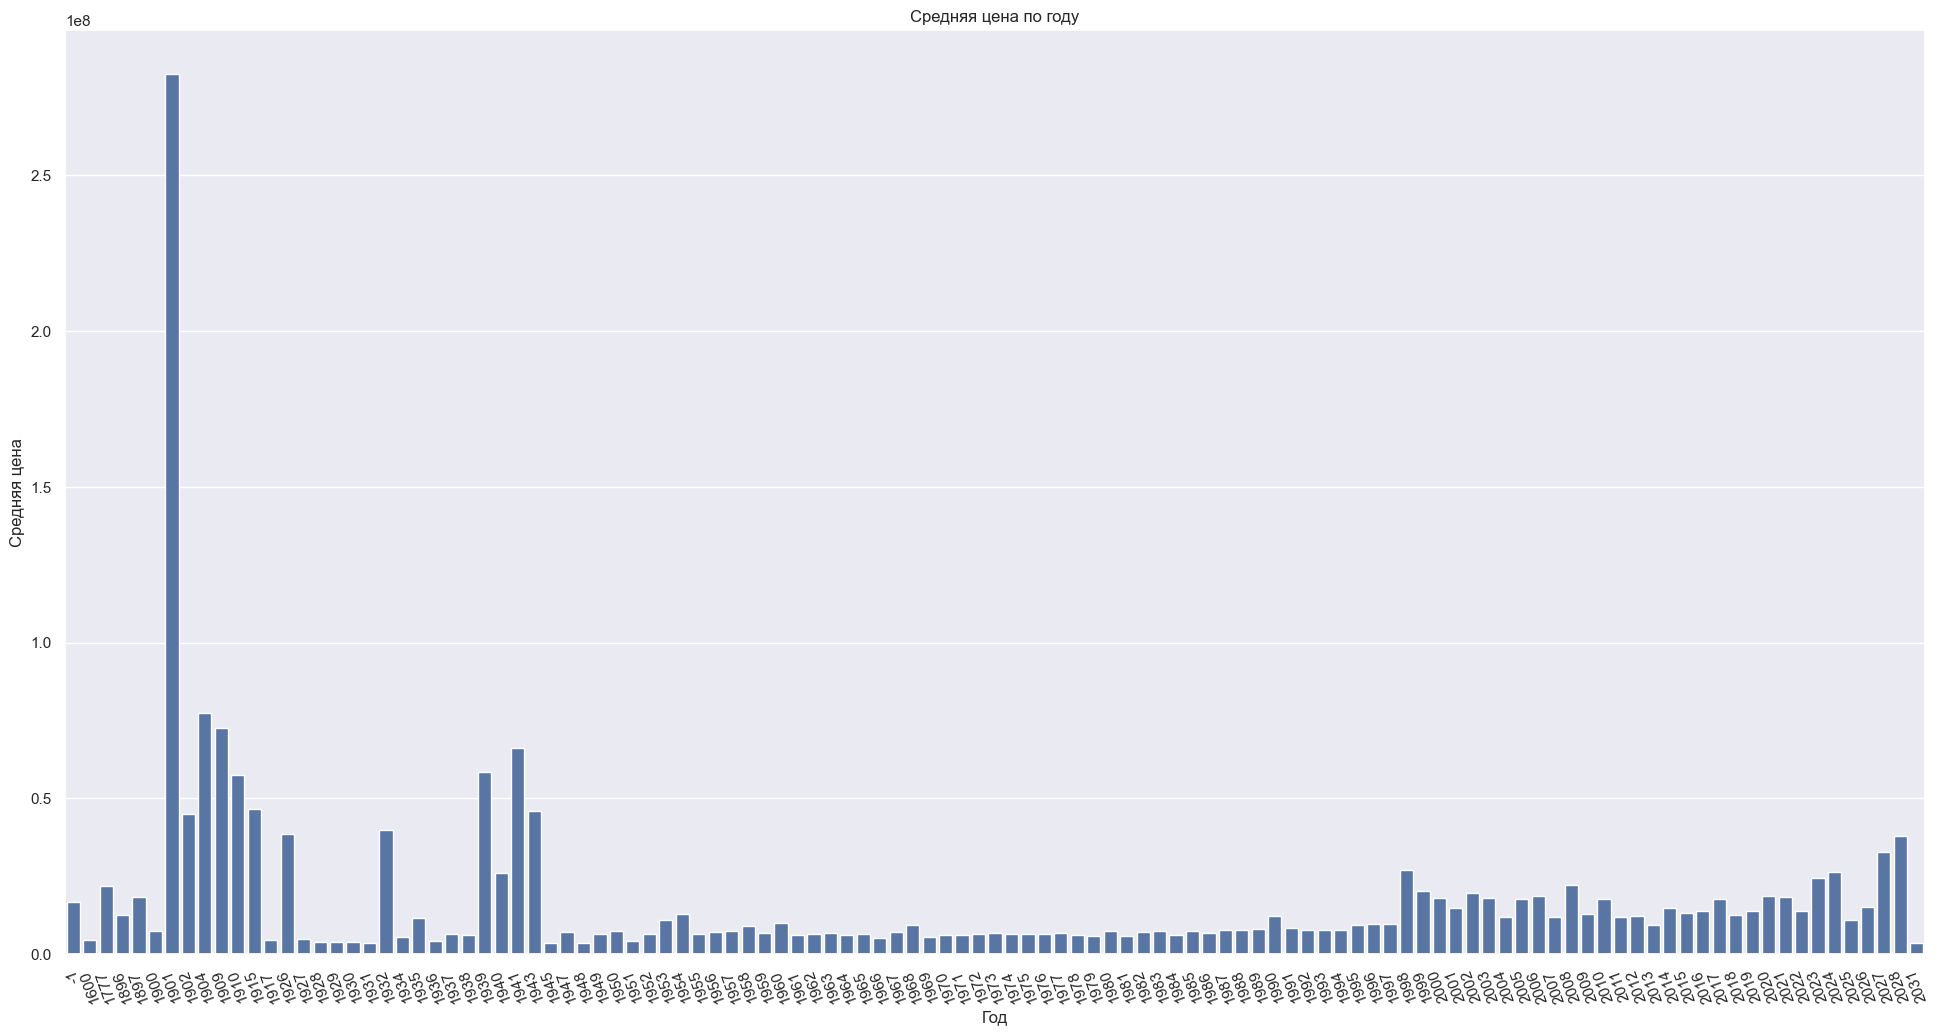

In [20]:
average_prices = df.groupby('year_of_construction')['price'].mean().reset_index()
average_prices

sns.set(style="darkgrid")
plt.figure(figsize=(24, 12))
sns.barplot(x='year_of_construction', y='price', data=average_prices)
plt.title('Средняя цена по году')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.xticks(rotation=110)

plt.show()

In [21]:
def number_encode_features(init_df):
    result = init_df.copy()  
    encoders = {}
    for column in result.columns:
        if result[column].dtype == object: 
            result[column] = result[column].astype(str)
            encoders[column] = preprocessing.LabelEncoder()  
            result[column] = encoders[column].fit_transform(result[column])  
    return result, encoders

encoded_data, encoders = number_encode_features(df)
encoded_data.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,185,1,4764,26,0,0,6.0,6.0,1.0,20.7,...,1,18.0,1.0,7.917510e+10,3.0,231,330,315,1,201
1,2592,4,4773,26,0,0,1.0,9.0,1.0,33.0,...,1,18.0,6.0,7.964553e+10,27.0,4,149,82,14,201
2,620,5,4788,26,0,0,4.0,4.0,1.0,14.0,...,1,-1.0,-1.0,7.980713e+10,-1.0,117,323,154,1,201
3,820,7,4801,26,0,0,5.0,5.0,1.0,17.5,...,1,-1.0,-1.0,7.964565e+10,-1.0,231,1114,319,1,201
4,2071,4,4792,26,0,0,4.0,7.0,1.0,25.9,...,1,20.0,5.0,7.909941e+10,35.0,231,660,472,1,201


<Axes: >

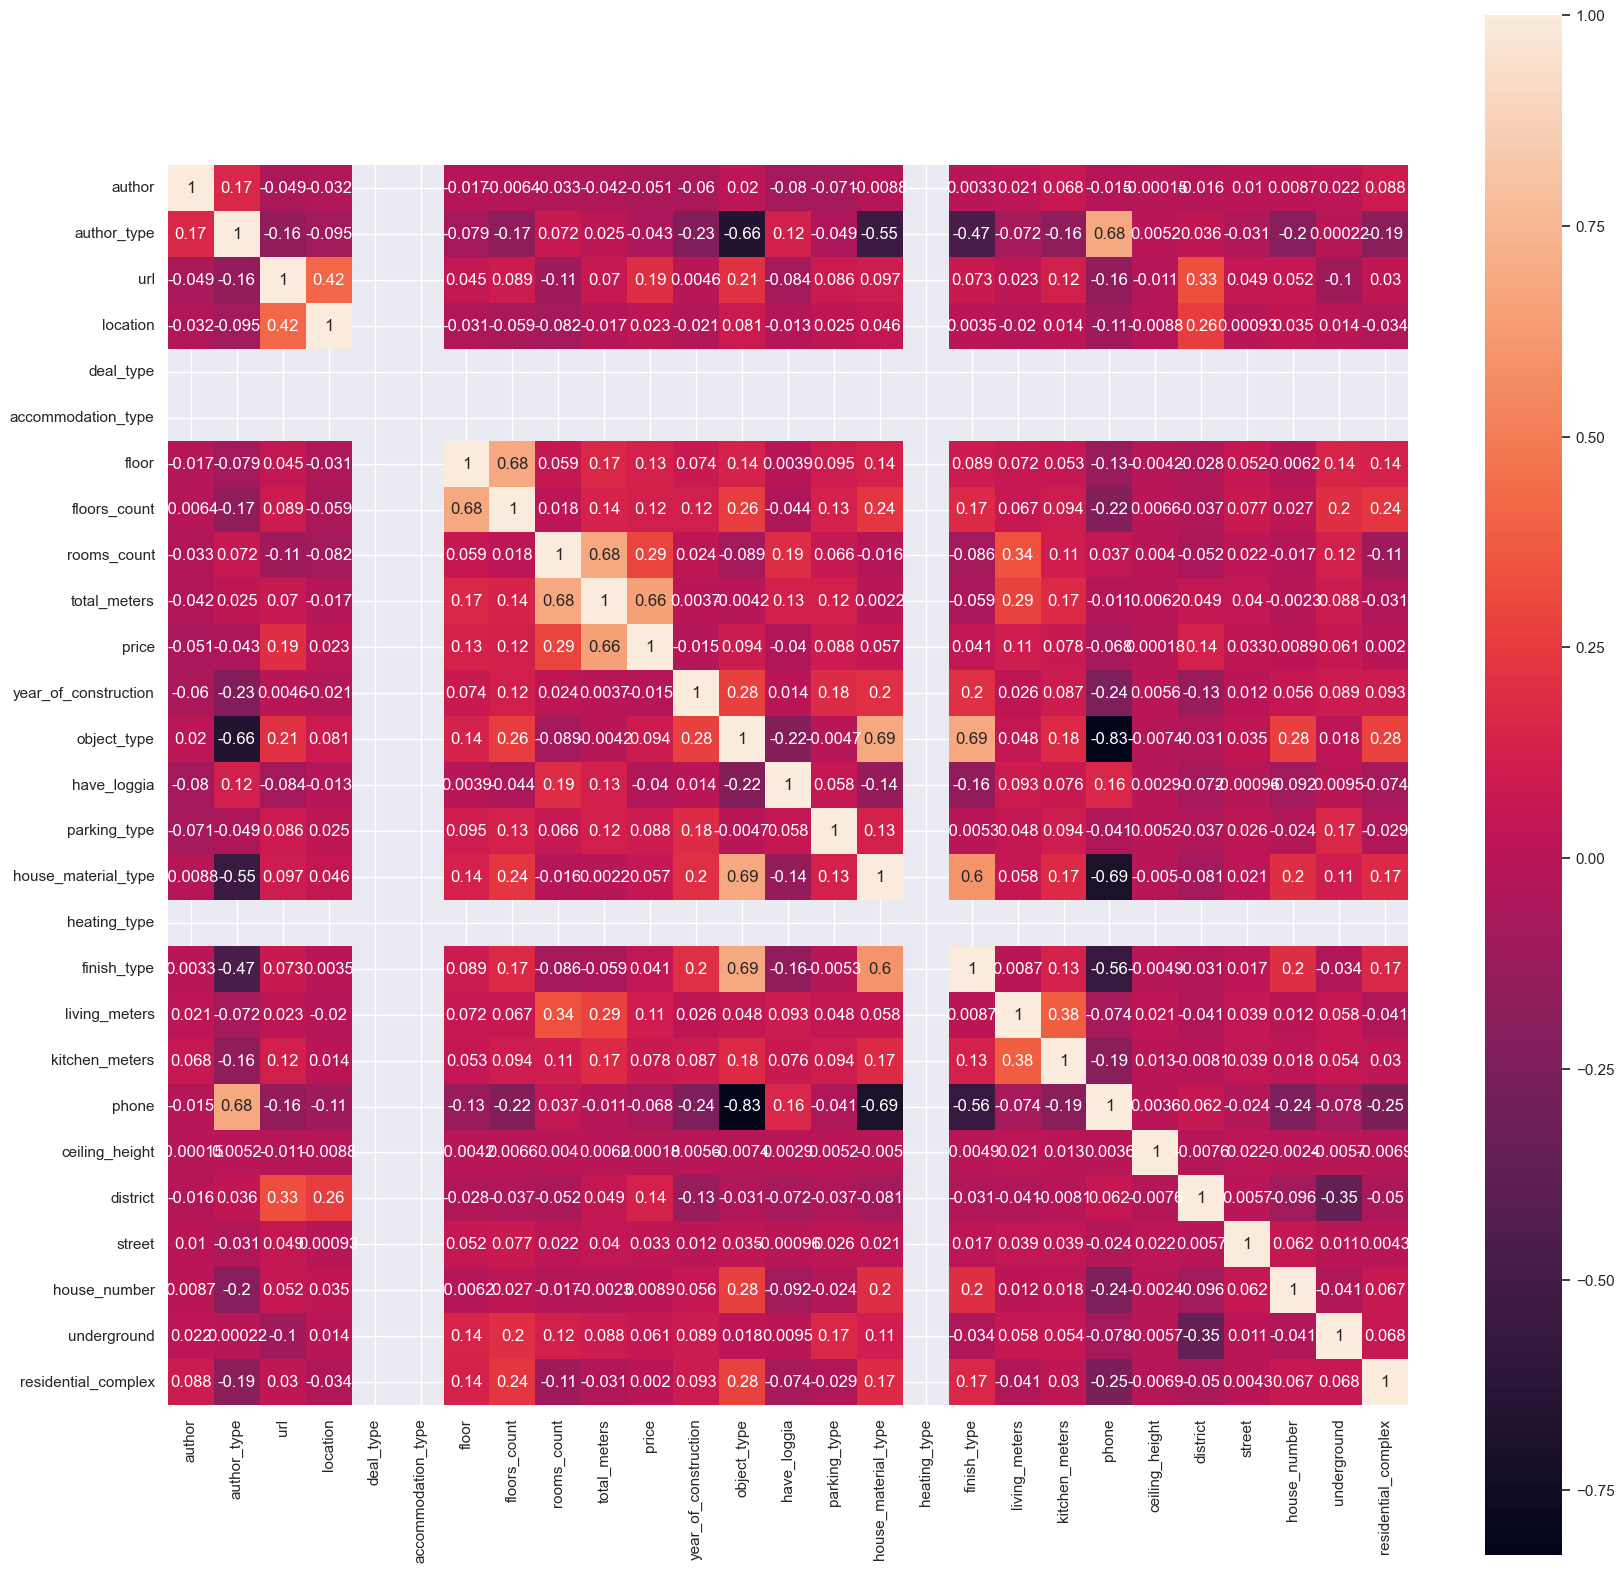

In [22]:

plt.subplots(figsize=(20,20))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True)

In [23]:
df['price_per_square_meter'] = df['price'] / df['total_meters']
df

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex,price_per_square_meter
0,115709096.0,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6.0,6.0,1.0,20.7,...,18.0,1.0,7.917510e+10,3.0,Серпухов,Крюкова,4.0,NaN,NaN,113526.570048
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1.0,9.0,1.0,33.0,...,18.0,6.0,7.964553e+10,27.0,NaN,Ворошилова,144.0,Аннино,NaN,125757.575758
2,3246838.0,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4.0,4.0,1.0,14.0,...,-1.0,-1.0,7.980713e+10,-1.0,Красный Текстильщик мкр,Красный Текстильщик,2.0,NaN,NaN,121428.571429
3,64398571.0,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5.0,5.0,1.0,17.5,...,-1.0,-1.0,7.964565e+10,-1.0,Серпухов,Российская,40.0,NaN,NaN,142857.142857
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4.0,7.0,1.0,25.9,...,20.0,5.0,7.909941e+10,35.0,Серпухов,Химиков,8.0,NaN,NaN,115830.115830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,МИЭЛЬ,real_estate_agent,https://mytishchi.cian.ru/sale/flat/308939371/,Мытищи,sale,flat,8.0,14.0,2.0,69.7,...,38.0,105.0,7.967209e+10,-1.0,NaN,Юбилейная,6.0,Медведково,Ярославский,163558.106169
8389,ПИК,developer,https://mytishchi.cian.ru/sale/flat/306943495/,Мытищи,sale,flat,19.0,25.0,2.0,48.1,...,227.0,161.0,7.495137e+10,262.0,NaN,NaN,NaN,Ростокино,Ярославский квартал ЖК,178940.000000
8390,47276638.0,homeowner,https://mytishchi.cian.ru/sale/flat/294184046/,Мытищи,sale,flat,3.0,5.0,2.0,45.0,...,-1.0,6.0,7.915327e+10,-1.0,NaN,Юбилейная,113.0,Медведково,NaN,162222.222222
8391,EstateLiga,real_estate_agent,https://mytishchi.cian.ru/sale/flat/304572510/,Мытищи,sale,flat,3.0,6.0,2.0,34.0,...,19.0,8.0,7.965110e+10,275.0,NaN,бульвар Тенистый,5.0,Медведково,Императорские Мытищи,188235.294118
